In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import pyvis
from pyvis.network import Network
import seaborn as sns
import numpy as np

In [2]:
# Load the data
data = pd.read_csv('investor_startup.csv')
df_rel = pd.read_csv('investor_startup_rel_freq.csv')

/var/folders/bz/td29f_kd0kb76lk9cgh2c0cw0000gn/T/ipykernel_60735/61997785.py:2: DtypeWarning: Columns (32,33,34,35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('df_present.csv')


In [3]:
data.describe()

Unnamed: 0  investment_count  total_funding  raised_amount  \
count  448477.000000     448476.000000   3.494000e+04   3.556030e+05   
mean   224238.000000        208.860719   1.351257e+09   9.350363e+07   
std    129464.302675        488.038178   2.035645e+10   9.697755e+09   
min         0.000000          1.000000   1.000000e+03   1.000000e+00   
25%    112119.000000          9.000000   3.000000e+06   1.290000e+06   
50%    224238.000000         43.000000   1.400000e+07   5.000000e+06   
75%    336357.000000        161.000000   7.133362e+07   1.750000e+07   
max    448476.000000       3730.000000   5.000500e+11   4.000000e+12   

       post_money_valuation  investor_count  num_funding_rounds  \
count          2.201700e+04   448477.000000       448477.000000   
mean           2.451063e+09        4.130606            3.679165   
std            5.141846e+10        4.168252            2.815932   
min            0.000000e+00        1.000000            1.000000   
25%            4.475000e+06        1.000000            2.000000   
50%            6.000000e+07        3.000000            3.000000   
75%            9.000000e+08        5.000000            5.000000   
max            5.736960e+12       95.000000           41.000000   

       total_funding_usd    num_exits  
count       3.940220e+05  5312.000000  
mean        9.574873e+07     4.797440  
std         6.892329e+08    16.270508  
min         0.000000e+00     0.000000  
25%         2.712000e+06     1.000000  
50%         1.429000e+07     1.000000  
75%         5.500000e+07     3.000000  
max         3.007981e+10   268.000000

17452
70411
Biotechnology,Health Care,Science and Engineering    26296
Health Care                                          13572
Financial Services                                    6151
Software                                              4828
Financial Services,Lending and Investments            4340
Information Technology,Software                       3262
Education,Software                                    3066
Commerce and Shopping                                 2782
Internet Services,Software                            2533
Transportation                                        2459
Name: category_groups_list, dtype: int64
<class 'pandas.core.series.Series'>
Biotechnology,Health Care,Science and Engineering
26296
Health Care
13572
Financial Services
6151
Software


/var/folders/bz/td29f_kd0kb76lk9cgh2c0cw0000gn/T/ipykernel_60735/2967273443.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d_['announced_on'] = pd.to_datetime(d_['announced_on'])
/var/folders/bz/td29f_kd0kb76lk9cgh2c0cw0000gn/T/ipykernel_60735/2967273443.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d_['announced_on'] = pd.to_datetime(d_['announced_on'])
/var/folders/bz/td29f_kd0kb76lk9cgh2c0cw0000gn/T/ipykernel_60735/2967273443.py:12: SettingWithCopyWarning: 
A value is trying to be set on a c

4828
Financial Services,Lending and Investments
4340
Information Technology,Software
3262
Education,Software
3066
Commerce and Shopping
2782
Internet Services,Software
2533
Transportation
2459


/var/folders/bz/td29f_kd0kb76lk9cgh2c0cw0000gn/T/ipykernel_60735/2967273443.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d_['announced_on'] = pd.to_datetime(d_['announced_on'])


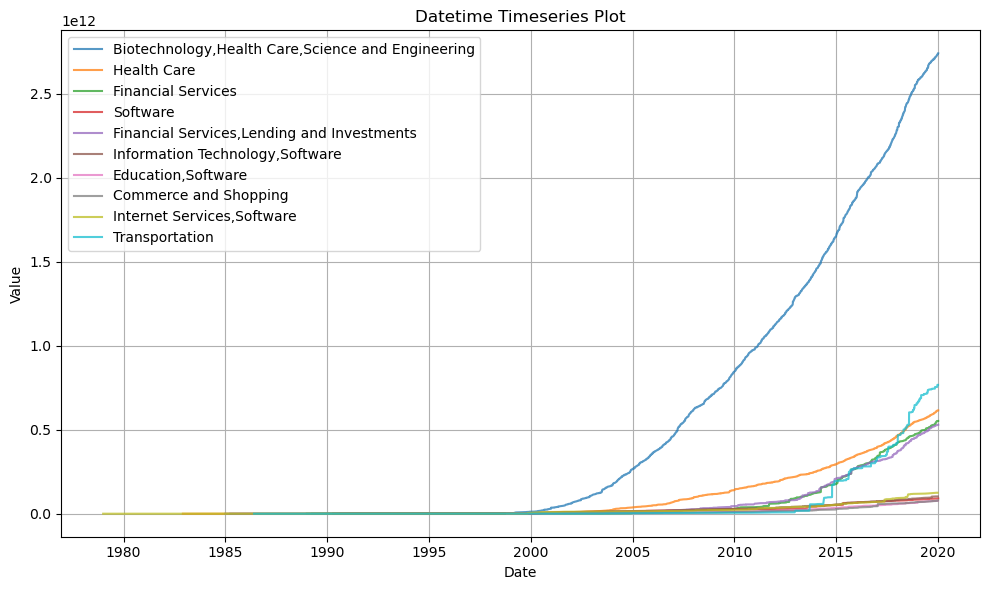

In [4]:
#Time Series
print(len(data.category_groups_list.unique()))
print(len(data.category_list.unique()))
plt.figure(figsize=(10,6))
investors_per_startup = data.category_groups_list.value_counts().head(10)
print(investors_per_startup)
print(type(data.announced_on))
for i in investors_per_startup.keys():
    print(i)
    d_ = data[data.category_groups_list == i]
    print(len(d_.index))
    d_['announced_on'] = pd.to_datetime(d_['announced_on'])
    #plt.scatter(d_['announced_on'], d_['total_funding_usd'], alpha = 0.25)
    grouped = d_.groupby('announced_on')['total_funding_usd'].sum()
    
    # Calculate cumulative sum
    cumsum = grouped.cumsum()
    
    plt.plot(cumsum.index, cumsum.values, label=i, alpha=0.75)
plt.title('Datetime Timeseries Plot')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [5]:
import plotly.graph_objects as go

# Create a plotly figure
fig = go.Figure()

investors_per_startup = data.category_groups_list.value_counts().head(10)

for cat in investors_per_startup.keys():
    d_ = data[data.category_groups_list == cat]
    d_['announced_on'] = pd.to_datetime(d_['announced_on'])
    
    # Group by date and calculate the cumulative sum
    cumsum = d_.groupby('announced_on')['total_funding_usd'].sum().cumsum()
    
    # Add a trace to the figure for each category
    fig.add_trace(go.Scatter(x=cumsum.index, y=cumsum.values, mode='lines', name=cat))

# Update layout for better readability
fig.update_layout(
    title="Datetime Timeseries Plot of Cumulative Funding for Top Categories",
    xaxis_title="Date",
    yaxis_title="Cumulative Funding (USD)",
    hovermode="x unified",  # Unified hover mode for better interactivity
)

# Show the plot
fig.show()


/var/folders/bz/td29f_kd0kb76lk9cgh2c0cw0000gn/T/ipykernel_60735/625394490.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/bz/td29f_kd0kb76lk9cgh2c0cw0000gn/T/ipykernel_60735/625394490.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/bz/td29f_kd0kb76lk9cgh2c0cw0000gn/T/ipykernel_60735/625394490.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [6]:
import plotly.graph_objects as go

# Create a plotly figure
fig = go.Figure()

# Convert announced_on column to datetime
data['announced_on'] = pd.to_datetime(data['announced_on'])

# Group by date and category, then count unique startups
grouped_data = data.groupby(['announced_on', 'category_groups_list'])['org_uuid'].nunique().reset_index()

# Consider only the top categories
top_categories = data['category_groups_list'].value_counts().head(10).index

for cat in top_categories:
    d_ = grouped_data[grouped_data['category_groups_list'] == cat]
    
    # Calculate cumulative sum of unique startups
    cumsum = d_['org_uuid'].cumsum()
    
    # Add a trace to the figure for each category
    fig.add_trace(go.Scatter(x=d_['announced_on'], y=cumsum, mode='lines', name=cat))

# Update layout for better readability
fig.update_layout(
    title="Growth in Number of Startups Over Time for Top Categories",
    xaxis_title="Date",
    yaxis_title="Cumulative Number of Startups",
    hovermode="x unified",  # Unified hover mode for better interactivity
)

# Show the plot
fig.show()
import plotly.io as pio

# Save the figure
pio.write_image(fig, 'startups_growth.png')



In [7]:
display(df_rel.head())
print(len(df_rel['investor_uuid'].unique()))

df_fb = df_rel[(df_rel['org_name']== 'Facebook') | (df_rel['investor_name']== 'Facebook')] 

df_fb_from = df_rel[df_rel['org_name']== 'Facebook' ] 
display(df_fb_from.head())
print(len(df_fb_from.index))
df_fb_to = df_rel[df_rel['investor_name']== 'Facebook' ] 
display(df_fb_to.head())
print(len(df_fb_to.index))
display(df_fb.head())
print(len(df_fb.index))

Unnamed: 0                              org_uuid       org_name  \
0           0  00000aa4-ba42-9b68-a9c3-040c9f3bf9b9  Formel D GmbH   
1           1  000014da-0c46-b9cb-0941-3a93c027b119        Resilio   
2           2  000014da-0c46-b9cb-0941-3a93c027b119        Resilio   
3           3  000014da-0c46-b9cb-0941-3a93c027b119        Resilio   
4           4  000014da-0c46-b9cb-0941-3a93c027b119        Resilio   

                          investor_uuid  \
0  5155fe13-45ed-d756-22a0-4b2b00633f1a   
1  07d82047-c9b7-1328-137f-117dacaa50ef   
2  0f704b0c-5a9f-d48a-6ff8-e7f15ab5873c   
3  2e96c6d3-92b8-4d14-a4d8-c7613f0e2115   
4  4b438a93-38f0-26db-b635-44c9402a60ff   

                           investor_name  frequency  
0                 CITIC Capital Holdings          1  
1  Vaekstfonden - The Danish Growth Fund          1  
2            The Market Development Fund          1  
3                               D.BOYTER          1  
4                             SYBO Games          1

66878


Unnamed: 0                              org_uuid  org_name  \
308858      308858  df662812-7f97-0b43-9d3e-12f64f504fbb  Facebook   
308859      308859  df662812-7f97-0b43-9d3e-12f64f504fbb  Facebook   
308860      308860  df662812-7f97-0b43-9d3e-12f64f504fbb  Facebook   
308861      308861  df662812-7f97-0b43-9d3e-12f64f504fbb  Facebook   
308862      308862  df662812-7f97-0b43-9d3e-12f64f504fbb  Facebook   

                               investor_uuid  \
308858  0159561f-be5d-81eb-7ccd-b4d6efeb30fc   
308859  02f87511-2b76-0f3d-7fed-109aba6dd5a5   
308860  07b32abd-3baf-b1dc-11f1-e3e929a6a330   
308861  321aaefe-527e-a56e-85cd-641bd83cd866   
308862  3f47be49-2e32-8118-01a0-31685a4d0fd7   

                            investor_name  frequency  
308858                        Mark Pincus          2  
308859                TriplePoint Capital          1  
308860  Goldman Sachs Investment Partners          1  
308861      Western Technology Investment          1  
308862                        Peter Thiel          1

25


Unnamed: 0                              org_uuid      org_name  \
19778       19778  0dff4d52-19b1-4bfc-ad7a-b6bc26da5f56  Coinbase CBT   
51178       51178  24dddd7c-0ead-43d4-9cde-6d0be6e422b3       Healofy   
62837       62837  2ce559d4-0610-fc20-76df-67cb701e68a4     Foodcloud   
71190       71190  32c9c1f1-a4e8-d5f6-e254-026e7d09705d        Meesho   
84410       84410  3c760a13-3478-1469-19df-c55fdc9155fe       Tuteria   

                              investor_uuid investor_name  frequency  
19778  df662812-7f97-0b43-9d3e-12f64f504fbb      Facebook          1  
51178  df662812-7f97-0b43-9d3e-12f64f504fbb      Facebook          1  
62837  df662812-7f97-0b43-9d3e-12f64f504fbb      Facebook          1  
71190  df662812-7f97-0b43-9d3e-12f64f504fbb      Facebook          2  
84410  df662812-7f97-0b43-9d3e-12f64f504fbb      Facebook          2

17


Unnamed: 0                              org_uuid      org_name  \
19778       19778  0dff4d52-19b1-4bfc-ad7a-b6bc26da5f56  Coinbase CBT   
51178       51178  24dddd7c-0ead-43d4-9cde-6d0be6e422b3       Healofy   
62837       62837  2ce559d4-0610-fc20-76df-67cb701e68a4     Foodcloud   
71190       71190  32c9c1f1-a4e8-d5f6-e254-026e7d09705d        Meesho   
84410       84410  3c760a13-3478-1469-19df-c55fdc9155fe       Tuteria   

                              investor_uuid investor_name  frequency  
19778  df662812-7f97-0b43-9d3e-12f64f504fbb      Facebook          1  
51178  df662812-7f97-0b43-9d3e-12f64f504fbb      Facebook          1  
62837  df662812-7f97-0b43-9d3e-12f64f504fbb      Facebook          1  
71190  df662812-7f97-0b43-9d3e-12f64f504fbb      Facebook          2  
84410  df662812-7f97-0b43-9d3e-12f64f504fbb      Facebook          2

42


Coinbase CBT Facebook
Healofy Facebook
Foodcloud Facebook
Meesho Facebook
Tuteria Facebook
The Trust Project Facebook
Xpresso Facebook
Ocean's Halo Facebook
CodePath.org Facebook
Gradely.ng Facebook
CoGrammar Facebook
Wheel the World Facebook
Hello Heart Facebook
Peanut Facebook
Coutloot Facebook
Technical University of Munich Facebook
JobSenz Facebook
.................
Facebook Mark Pincus
Facebook TriplePoint Capital
Facebook Goldman Sachs Investment Partners
Facebook Western Technology Investment
Facebook Peter Thiel
Facebook Oakhouse Partners
Facebook ECONA AG
Facebook Reid Hoffman
Facebook Artis Ventures (AV)
Facebook Horizons Ventures
Facebook General Atlantic
Facebook Elevation Partners
Facebook Meritech Capital Partners
Facebook SV Angel
Facebook DST Global
Facebook All Blue Capital
Facebook Global Founders Capital
Facebook Accel
Facebook Cambrian Ventures
Facebook TCV
Facebook Breyer Capital
Facebook Tiger Global Management
Facebook Greylock Partners
Facebook Founders Fund
Fac

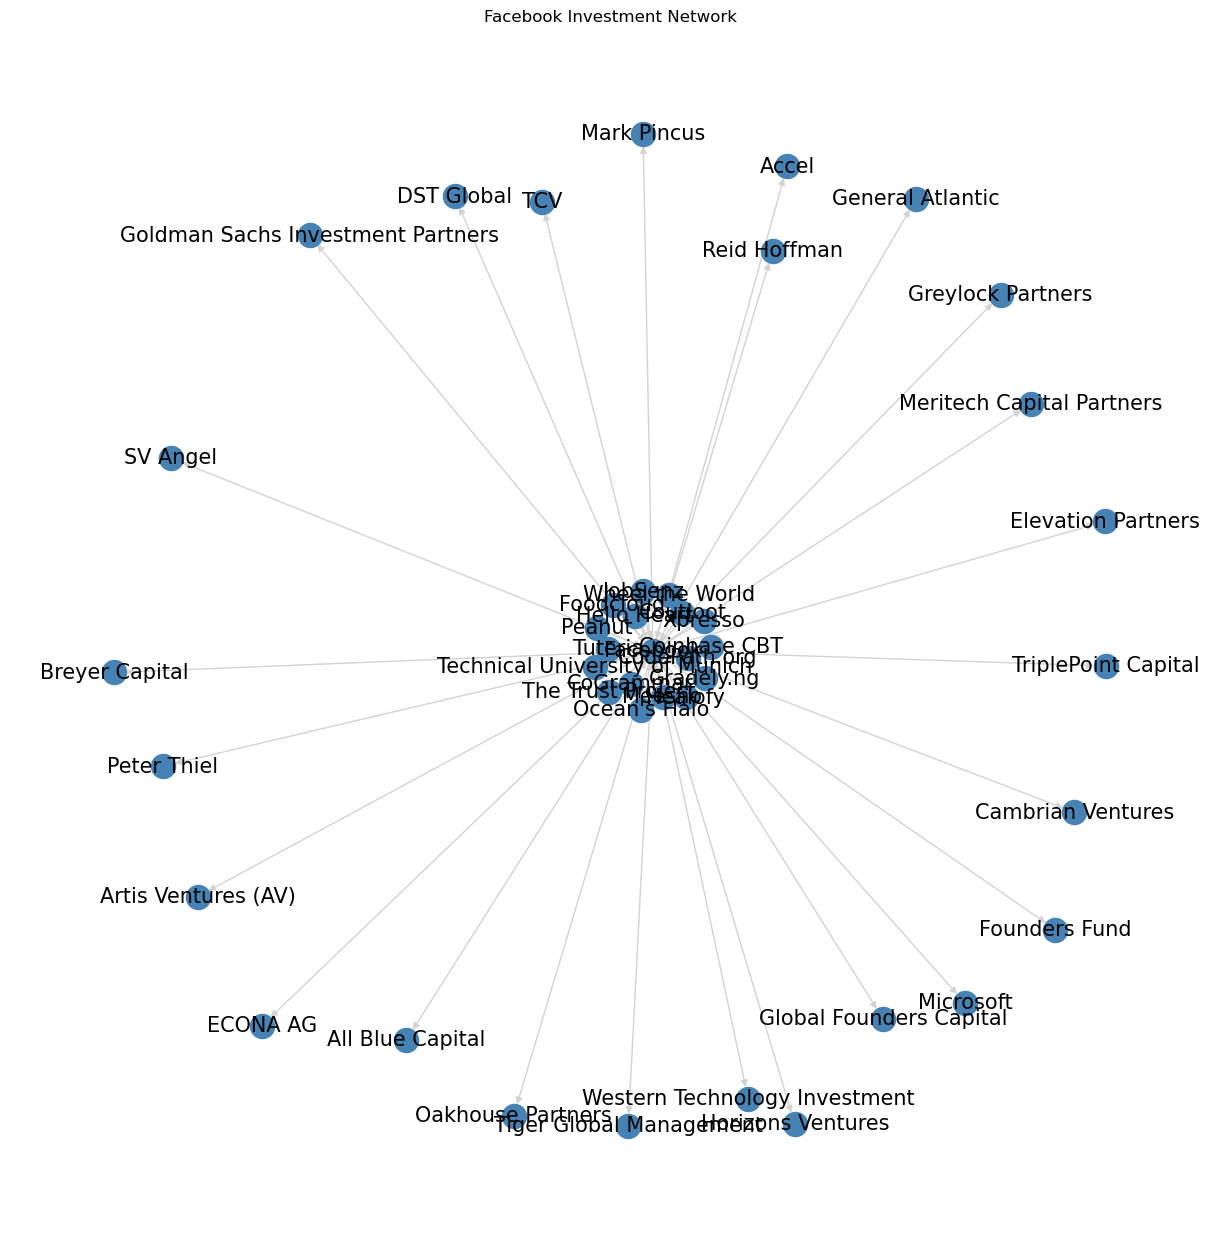

In [8]:
# Create a directed graph
G = nx.DiGraph()

G.add_nodes_from(df_fb['investor_name'].unique(), bipartite=0, type='org')
G.add_nodes_from(df_fb['org_name'].unique(), bipartite=1, type='investor')

for _, row in df_fb.iterrows():
#print(row['org_name'], row['investor_name'])
    if row['org_name'] != 'Facebook':
        print(row['org_name'], row['investor_name'])
        G.add_edge(row['org_name'], row['investor_name'])
    
    
print('.................')
for _, row in df_fb.iterrows():
    if row['org_name'] == 'Facebook':
        print(row['org_name'], row['investor_name'])
        G.add_edge(row['org_name'], row['investor_name'])

print(G)

# Draw the graph
pos = nx.spring_layout(G)
plt.figure(figsize=(12, 12))
nx.draw(G, pos, with_labels=True, node_size=300, node_color="steelblue", font_size=15, width=1, edge_color="lightgrey")



plt.title("Facebook Investment Network")
plt.show()

In [9]:
for node in G.nodes():
    if 'Facebook' in G.predecessors(node):
        G.nodes[node]['color'] = 'salmon'
        G.nodes[node]['borderColor'] = 'black'
    else:
        
        G.nodes[node]['color'] = 'steelblue'
        G.nodes[node]['borderColor'] = 'black'

# Set a distinct color for 'Facebook' node
G.nodes['Facebook']['color'] = 'crimson'
G.nodes['Facebook']['borderColor'] = 'black'

# Create a pyvis network from the NetworkX graph
nt = Network(notebook=True)
nt.from_nx(G)
for node in nt.nodes:
    node['color'] = G.nodes[node['id']]['color']
    node['borderColor'] = G.nodes[node['id']]['borderColor']

# Ensure edges are gray
for edge in nt.edges:
    edge['color'] = 'gray'

nt.show("facebook_network.html")

facebook_network.html


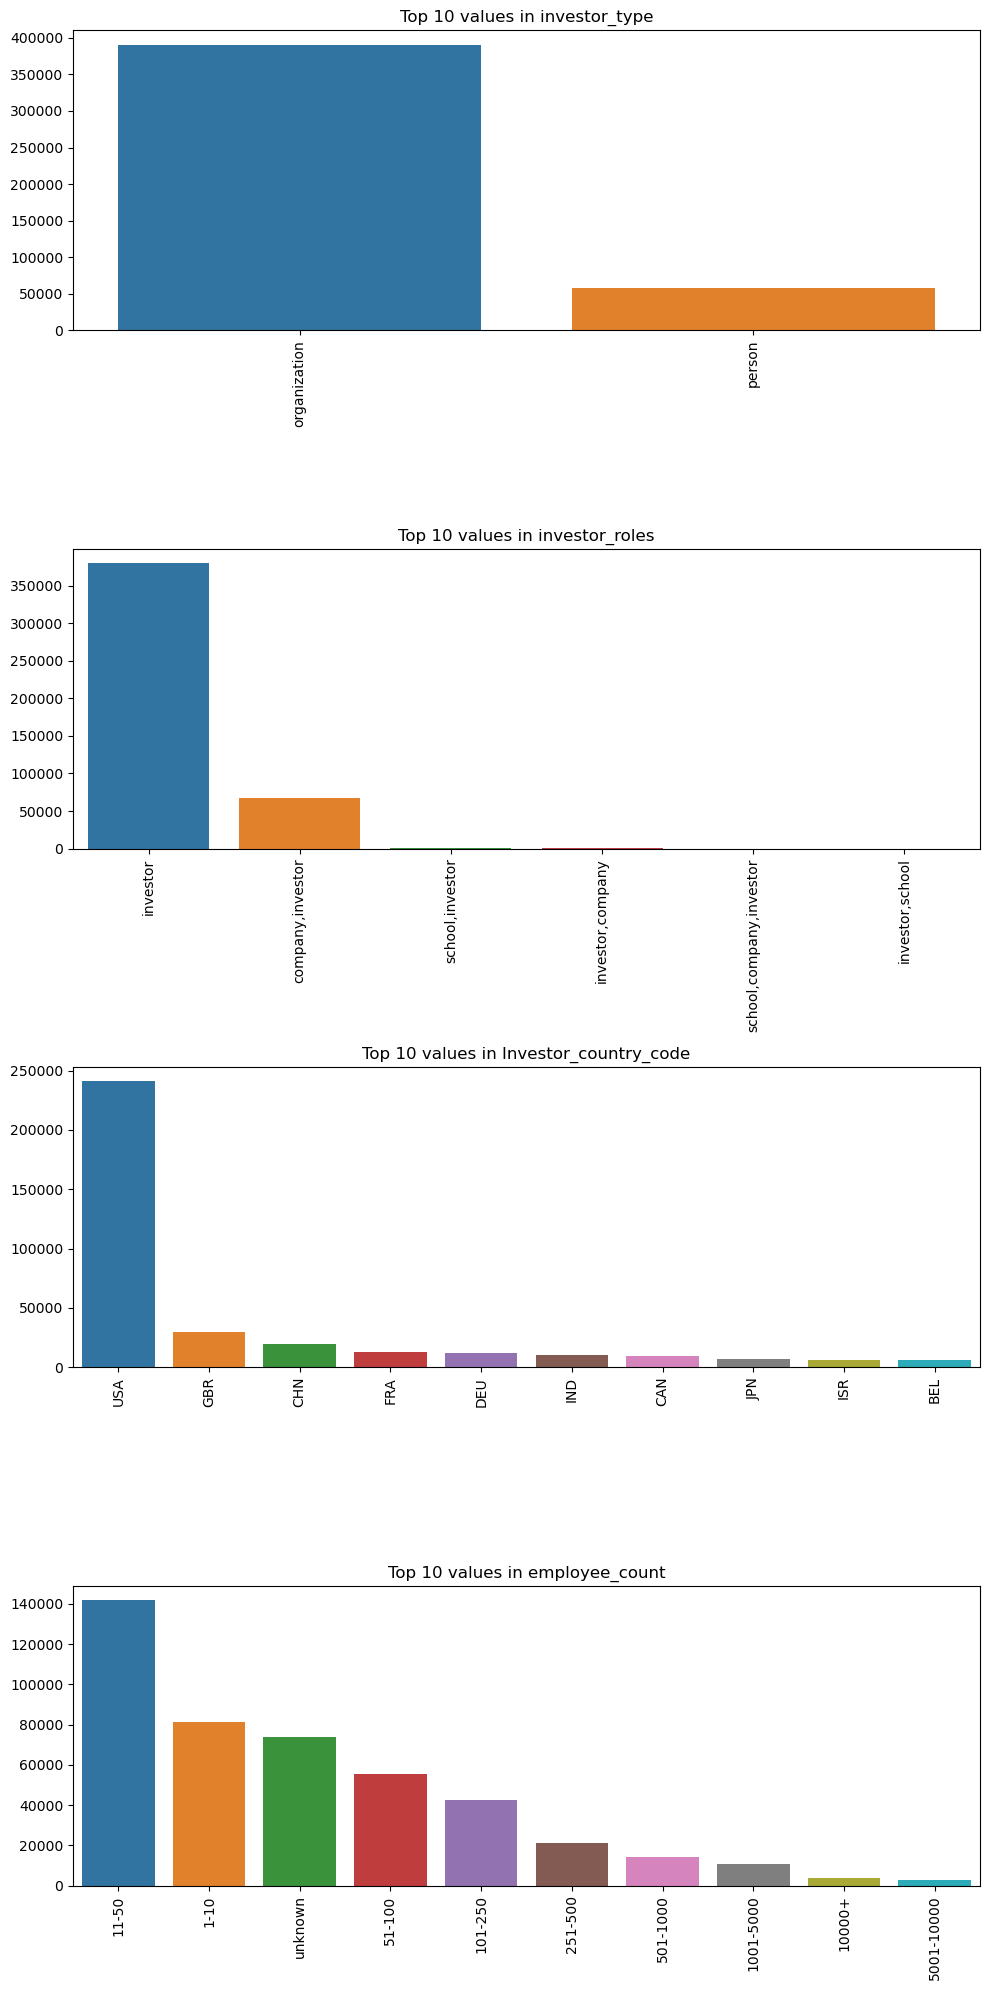

In [10]:
# Select columns for bar plots
columns = ['investor_type', 'investor_roles', 'Investor_country_code', 'employee_count']

# Create a figure to hold the subplots
fig, axs = plt.subplots(len(columns), figsize=(10, 20))

# Create a bar plot for each column
for i, col in enumerate(columns):
    # Get the top 10 most common values
    top_values = data[col].value_counts().head(10)

    # Create a bar plot
    sns.barplot(x=top_values.index, y=top_values.values, ax=axs[i])
    
    # Set the title
    axs[i].set_title(f'Top 10 values in {col}')
    
    # Rotate the x-axis labels for readability
    axs[i].tick_params(axis='x', rotation=90)

# Improve layout
plt.tight_layout()
plt.show()

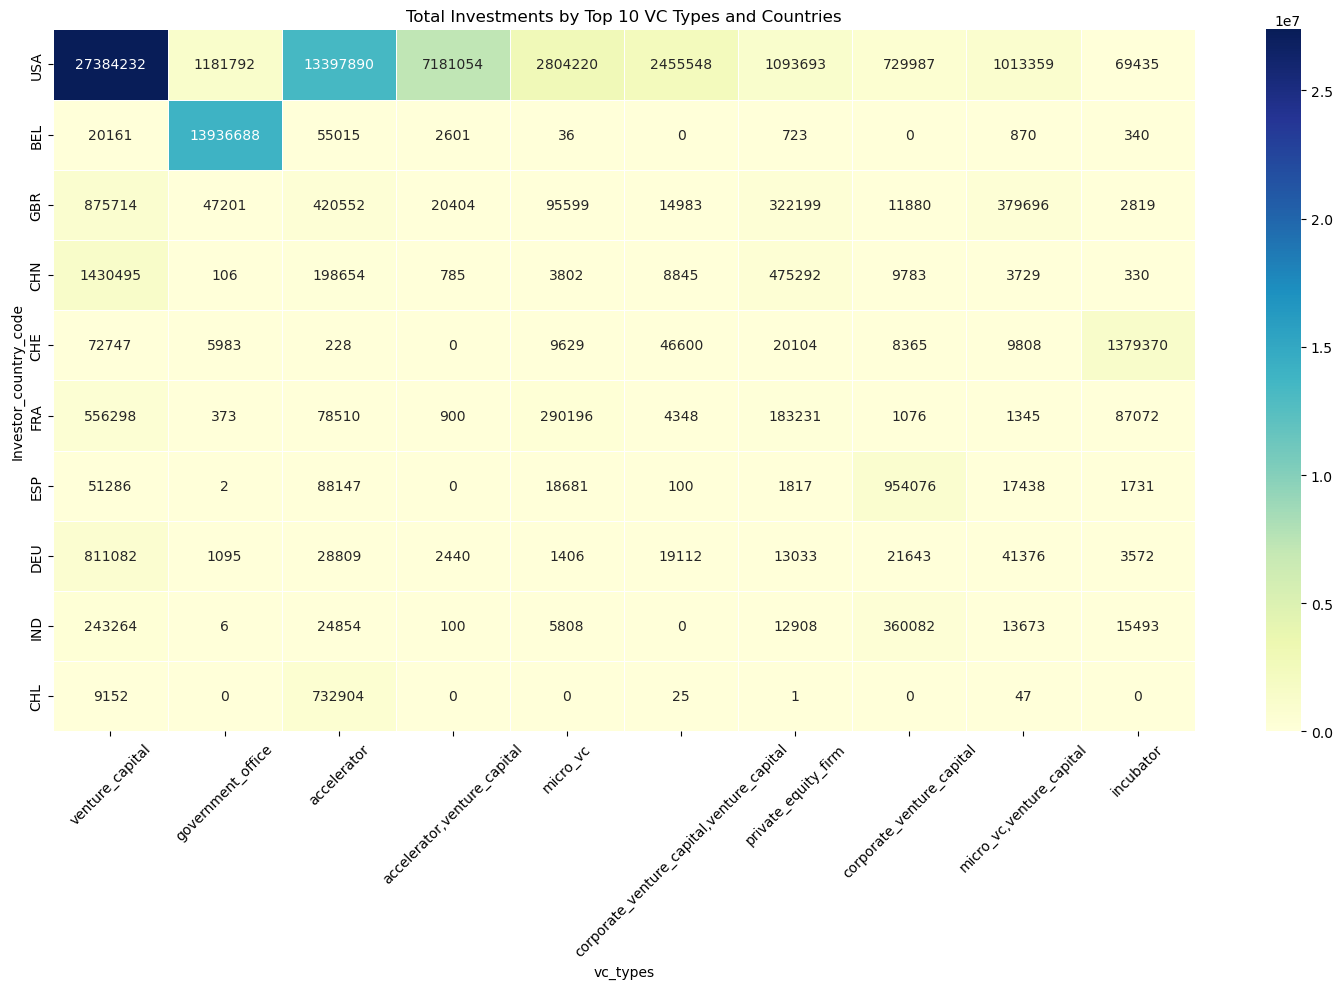

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt


# Use pivot_table instead of pivot
heatmap_data = data.pivot_table(index='Investor_country_code', columns='vc_types', values='investment_count', aggfunc='sum')
heatmap_data = heatmap_data.fillna(0)  # Fill NaN values with 0

# Filter for top 10 VC types and countries
top_vc_types = heatmap_data.sum(axis=0).nlargest(10).index
top_countries = heatmap_data.sum(axis=1).nlargest(10).index
filtered_data = heatmap_data.loc[top_countries, top_vc_types]

# Create a heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(filtered_data, cmap='YlGnBu', annot=True, fmt=".0f", linewidths=.5)

# Enhance the plot
plt.title('Total Investments by Top 10 VC Types and Countries')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



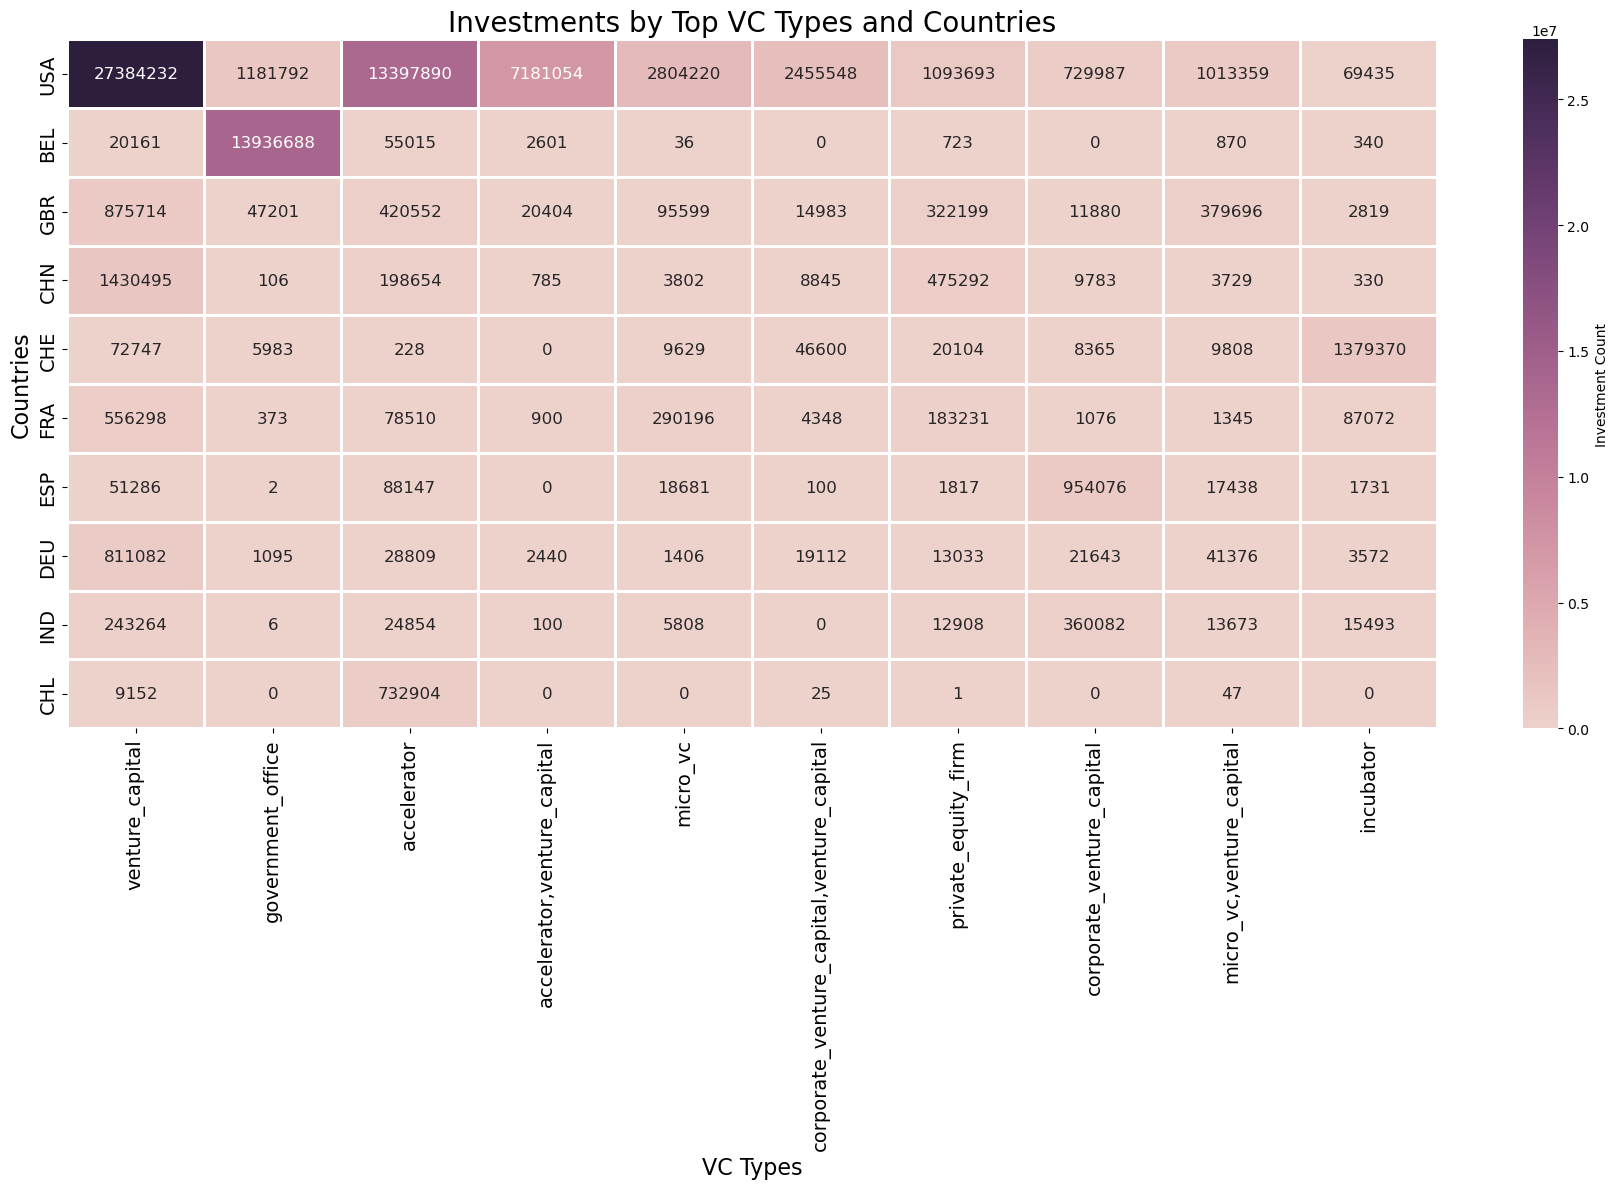

In [12]:
# Adjusting the heatmap for improved visualization

# Set a sequential color palette (cubehelix is a good option for clear differentiation)
cmap = sns.cubehelix_palette(as_cmap=True)

# Adjust the size for better readability
plt.figure(figsize=(18, 12))

# Define the range of color values - you might want to adjust vmin and vmax based on your data's range
vmin_val = 0
vmax_val = filtered_data.max().max()

# Create the heatmap with enhanced properties
sns.heatmap(filtered_data, 
            cmap=cmap, 
            annot=True, 
            fmt=".0f", 
            linewidths=1, 
            linecolor='white', 
            cbar_kws={'label': 'Investment Count'},
            annot_kws={"size": 12},  # Increased font size for annotations
            vmin=vmin_val, 
            vmax=vmax_val)

# Enhance the plot with improved titles and labels
plt.title('Investments by Top VC Types and Countries', fontsize=20)
plt.xlabel('VC Types', fontsize=16)
plt.ylabel('Countries', fontsize=16)
plt.xticks(rotation=90, fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()

# Display the enhanced heatmap
plt.show()
